#Code for merging datasets for all years - 2000 to 2019
import os
import pandas as pd

folder_path = r"C:\AeshaDAB\Sem3\Capstone1\Dataset"
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".xlsx")]

dataframes = []

for file_path in file_paths:
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File '{file_path}' not found.")
    else:
        print(f"Reading data from '{file_path}'")
        year = os.path.splitext(os.path.basename(file_path))[0]
        df = pd.read_excel(file_path)
        df['C_YEAR'] = year
        dataframes.append(df)

if dataframes:
    # Merge all DataFrames into a single DataFrame
    merged_data = pd.concat(dataframes, ignore_index=True)

    # Save the merged DataFrame to a CSV file
    merged_data.to_csv("merged_years_mvc.csv", index=False)

    # Read the merged DataFrame from the CSV file
    merged_data = pd.read_csv("merged_years_mvc.csv")

    # Get unique years from the 'C_YEAR' column
    unique_years = merged_data['C_YEAR'].unique()
    num_unique_years = len(unique_years)

    print(f"Number of unique years: {num_unique_years}")
else:
    print("No dataframes were created. Please check your files and paths.")

##Loading the Dataset & Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/merged_years_mvc.csv'
df = pd.read_csv(file_path)
df.head(2).T
#df

<ipython-input-3-6a287497560f>:2: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,0,1
C_YEAR,y_2000_en,y_2000_en
C_MNTH,1,1
C_WDAY,1,1
C_HOUR,16,16
C_SEV,2,2
C_VEHS,2,2
C_CONF,21,21
C_RCFG,UU,UU
C_WTHR,1,1
C_RSUR,1,1


## Data Inspection

In [ ]:
#datacopy = df

In [ ]:
data = df

In [ ]:
#Inspecting the datatype of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6913204 entries, 0 to 6913203
Data columns (total 23 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  object
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
 22  C_CASE  int64 
dtypes: int64(2), object(21)
memory usage: 1.2+ GB


In [ ]:
#Viewing data dimensions
data.shape

(6913204, 23)

There are 6.9 million records, and 23 features.

### Rename  The Columns

In [ ]:
#Renaming the columns for better understanding
data = data.rename(columns={
    'C_YEAR': 'Year',
    'C_MNTH': 'Month',
    'C_WDAY': 'Weekday',
    'C_HOUR': 'Hour',
    'C_SEV': 'Severity',
    'C_VEHS': 'Num_vehicles',
    'C_CONF': 'Collision_configuration',
    'C_RCFG': 'Road_configuration',
    'C_WTHR': 'Weather_condition',
    'C_RSUR': 'Road_surface',
    'C_RALN': 'Road_alignment',
    'C_TRAF': 'Traffic_control',
    'V_ID': 'vehicle_id',
    'V_TYPE': 'Vehicle_type',
    'V_YEAR': 'Vehicle_year',
    'P_ID': 'Person_id',
    'P_SEX': 'Person_sex',
    'P_AGE': 'Person_age',
    'P_PSN': 'Person_position',
    'P_ISEV': 'Person_injury_severity',
    'P_SAFE': 'Safety_device_used',
    'P_USER': 'Road_user_type',
    'C_CASE': 'Collision_case',
    })

## Statistical Summary

In [ ]:
#Summary Statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,6913204,20,y_2000_en,422075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,6913204.0,17.0,8.0,640546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekday,6913204.0,15.0,5.0,675079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,6913204,25,16,616745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity,6913204.0,NaN,NaN,NaN,1.983509,0.127354,1.0,2.0,2.0,2.0,2.0
Num_vehicles,6913204.0,86.0,2.0,2588234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Collision_configuration,6913204,20,21,2081140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Road_configuration,6913204,12,2,3219265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weather_condition,6913204,9,1,4831197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Road_surface,6913204,11,1,4559289,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
categorical_df = pd.DataFrame(data[categorical_attributes])

# Set the plot size
plt.figure(figsize=(15, 10))

# Loop through each categorical attribute and create count plots
for i, col in enumerate(categorical_df.columns):
    plt.subplot(4, 3, i+1)  # Adjust the subplot layout as per your number of attributes
    sns.countplot(x=col, data=categorical_df)
    plt.xticks(rotation='vertical')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

NameError: ignored

In [ ]:
# Checking for null values
null_values = data.isnull().sum()
null_values

Year                       0
Month                      0
Weekday                    0
Hour                       0
Severity                   0
Num_vehicles               0
Collision_configuration    0
Road_configuration         0
Weather_condition          0
Road_surface               0
Road_alignment             0
Traffic_control            0
vehicle_id                 0
Vehicle_type               0
Vehicle_year               0
Person_id                  0
Person_sex                 0
Person_age                 0
Person_position            0
Person_injury_severity     0
Safety_device_used         0
Road_user_type             0
Collision_case             0
dtype: int64

In [ ]:
#Count of unique values in each feature
data.nunique()

Year                            20
Month                           17
Weekday                         15
Hour                            25
Severity                         2
Num_vehicles                    86
Collision_configuration         20
Road_configuration              12
Weather_condition                9
Road_surface                    11
Road_alignment                   8
Traffic_control                 19
vehicle_id                     164
Vehicle_type                    20
Vehicle_year                   116
Person_id                       96
Person_sex                       4
Person_age                     101
Person_position                 16
Person_injury_severity           5
Safety_device_used              10
Road_user_type                   6
Collision_case             2634951
dtype: int64

In [ ]:
#We are not converting U's because, that means its a hit and run case

data.replace(['U', 'UU', 'UUUU'], 0, inplace=True)

#convert ',N', 'Q', 'NN', 'NNNN', 'QQ', 'QQQQ', 'QQQQ', 'NNN' to np.nan
placeholders_for_nan = [',N', 'Q', 'NN', 'NNNN', 'QQ', 'QQQQ', 'QQQQ', 'NNN']
data.replace(placeholders_for_nan, np.nan, inplace=True)


In [ ]:
#sum of null values in each feature
data.isnull().sum()

Year                            0
Month                           0
Weekday                         0
Hour                            0
Severity                        0
Num_vehicles                    0
Collision_configuration    351708
Road_configuration         176414
Weather_condition           16749
Road_surface               203519
Road_alignment              31353
Traffic_control             96489
vehicle_id                      0
Vehicle_type               310410
Vehicle_year               317721
Person_id                   12334
Person_sex                      0
Person_age                  19779
Person_position             66112
Person_injury_severity          0
Safety_device_used         773948
Road_user_type                  0
Collision_case                  0
dtype: int64

##Handling Null Values in Important Features

1. Person_age

In [ ]:
age_median = data['Person_age'].median()
#Filled NaN values in 'Person_age' with the calculated median
data['Person_age'].fillna(age_median, inplace=True)
data.isnull().sum()

Year                            0
Month                           0
Weekday                         0
Hour                            0
Severity                        0
Num_vehicles                    0
Collision_configuration    351708
Road_configuration         176414
Weather_condition           16749
Road_surface               203519
Road_alignment              31353
Traffic_control             96489
vehicle_id                      0
Vehicle_type               310410
Vehicle_year                    0
Person_id                   12334
Person_sex                      0
Person_age                      0
Person_position             66112
Person_injury_severity          0
Safety_device_used              0
Road_user_type                  0
Collision_case                  0
dtype: int64

In [ ]:
#changing 'Person_age' datatype from object to integer
data['Person_age'] = data['Person_age'].astype(int)

2. Safety Device Used

In [ ]:
data['Safety_device_used'].unique()

array(['2', nan, '12', '9', '13', '1', 0, '11', '10'], dtype=object)

In [ ]:
#we will replace nan with 20 here (categorical value): which means people might not have used any safety devices
data['Safety_device_used'].fillna(50, inplace=True)
data['Safety_device_used'].isnull().sum()

0

In [ ]:
data.isnull().sum()

Year                            0
Month                           0
Weekday                         0
Hour                            0
Severity                        0
Num_vehicles                    0
Collision_configuration    351708
Road_configuration         176414
Weather_condition           16749
Road_surface               203519
Road_alignment              31353
Traffic_control             96489
vehicle_id                      0
Vehicle_type               310410
Vehicle_year               317721
Person_id                   12334
Person_sex                      0
Person_age                      0
Person_position             66112
Person_injury_severity          0
Safety_device_used              0
Road_user_type                  0
Collision_case                  0
dtype: int64

3. Year (extract the year from string)

In [ ]:
# Handling the 'Year' column: Extracting the year from the string
data['Year']= data['Year'].str.extract('(\d+)')
data['Year']

0          2000
1          2000
2          2000
3          2000
4          2000
           ... 
6913199    2019
6913200    2019
6913201    2019
6913202    2019
6913203    2019
Name: Year, Length: 6913204, dtype: object

4. Vehicle_year

In [ ]:
vehicle_year_median = data['Vehicle_year'].median()
#Filled NaN values in 'Vehicle_year' with the calculated median
data['Vehicle_year'].fillna(vehicle_year_median, inplace=True)

##Converting categorical datatypes to **numerical**

In [ ]:
#data['Year'] = pd.to_numeric(data['Year']).astype(int)
data['Hour'] = pd.to_numeric(data['Hour']).astype(int)
data['Weekday'] = pd.to_numeric(data['Weekday']).astype(int)
data['Month'] = pd.to_numeric(data['Month']).astype(int)
data['Num_vehicles'] = pd.to_numeric(data['Num_vehicles']).astype(int)
#data['vehicle_id'] = pd.to_numeric(data['vehicle_id']).astype(int)
data['Vehicle_year'] = pd.to_numeric(data['Vehicle_year']).astype(int)
#data['Person_id'] = pd.to_numeric(data['Person_id']).astype(int)

In [ ]:
data.dtypes

Year                       object
Month                       int64
Weekday                     int64
Hour                        int64
Severity                    int64
Num_vehicles                int64
Collision_configuration    object
Road_configuration         object
Weather_condition          object
Road_surface               object
Road_alignment             object
Traffic_control            object
vehicle_id                 object
Vehicle_type               object
Vehicle_year                int64
Person_id                  object
Person_sex                 object
Person_age                  int64
Person_position            object
Person_injury_severity     object
Safety_device_used         object
Road_user_type             object
Collision_case              int64
dtype: object

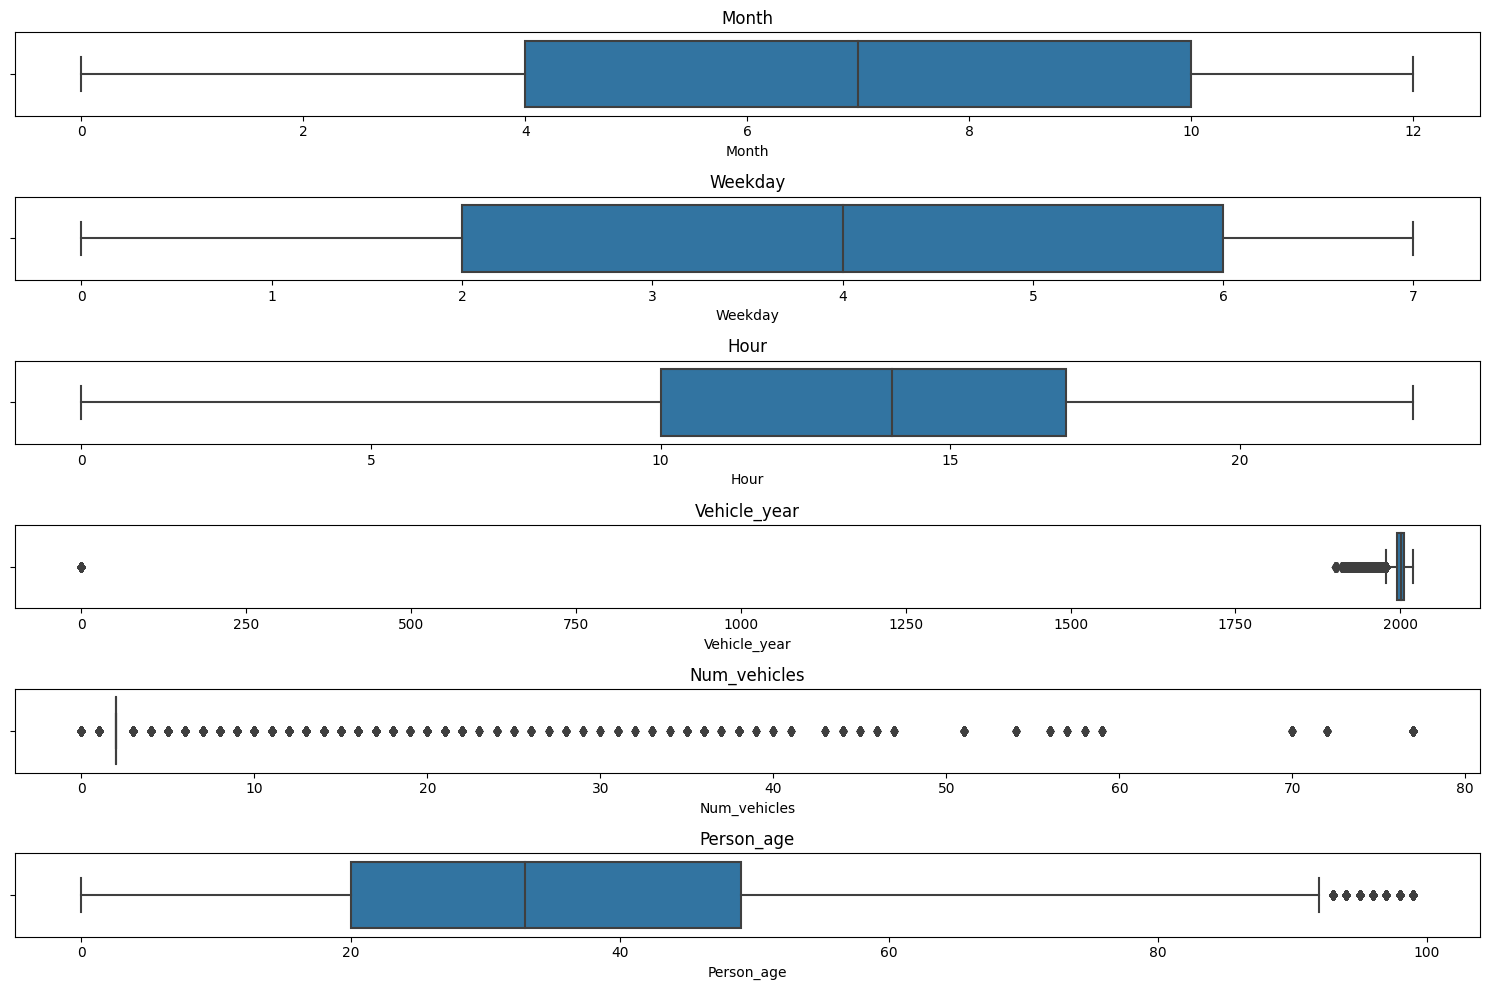

In [ ]:
#Filtering the integer columns based on the specified list
filtered_integer_columns = ['Month', 'Weekday', 'Hour','Vehicle_year', 'Num_vehicles',  'Person_age']

plt.figure(figsize=(15, 10))

for i, column in enumerate(filtered_integer_columns, 1):# for index, value in enumerate(iterable,starat = 0):
    plt.subplot(len(filtered_integer_columns), 1, i)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


#### null_values in month

In [ ]:
data.loc[data['Month'] > 12] = np.nan
#month_median = data['Month'].median()
data['Month'].fillna(13, inplace=True)
data['Month'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  0.])

In [ ]:
#month_median

In [ ]:
data.shape

(6913204, 23)

#### Null values in vehicle year

In [ ]:
data['Vehicle_year'].unique()
#we have a zero, which is a outlier

array([   0., 2001., 2000., 1997., 1989., 1999., 1993., 1990., 1991.,
       1980., 1994., 1988., 1995., 1996., 1982., 1998., 1985., 1986.,
       1992., 1987., 1984., 1979., 1978., 1983., 1975., 1976., 1974.,
       1981., 1967., 1977., 1961., 1964., 1972., 1956., 1971., 1973.,
       1969., 1970., 1947., 1957., 1963., 1966., 1955., 1950., 1962.,
       1917., 1948., 1968., 1914., 1913., 1940., 1920., 1951., 1965.,
       1932., 1925., 1953., 1927., 2002., 1939., 1960., 1941., 1945.,
       1938., 1949., 1954., 1916., 1933., 1935., 1929., 1937., 1959.,
       1930., 1923., 1928., 1944., 1958., 1942., 1919., 1926., 1931.,
       1918., 2003., 1952., 1946., 1924., 1922., 1901., 1915., 1934.,
       1903., 2004., 2005., 1904., 2006., 1912., 2007., 2008., 1943.,
       1911., 2009., 2010., 2011., 1936., 2012., 1910., 1921., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020.])

In [ ]:
#Filtering out the years and removing outliers
data = data[(data['Vehicle_year'] > 0) & (data['Vehicle_year'] <= 2019)]
unique_vehicle_years = data['Vehicle_year'].unique()
unique_vehicle_years


array([2001., 2000., 1997., 1989., 1999., 1993., 1990., 1991., 1980.,
       1994., 1988., 1995., 1996., 1982., 1998., 1985., 1986., 1992.,
       1987., 1984., 1979., 1978., 1983., 1975., 1976., 1974., 1981.,
       1967., 1977., 1961., 1964., 1972., 1956., 1971., 1973., 1969.,
       1970., 1947., 1957., 1963., 1966., 1955., 1950., 1962., 1917.,
       1948., 1968., 1914., 1913., 1940., 1920., 1951., 1965., 1932.,
       1925., 1953., 1927., 2002., 1939., 1960., 1941., 1945., 1938.,
       1949., 1954., 1916., 1933., 1935., 1929., 1937., 1959., 1930.,
       1923., 1928., 1944., 1958., 1942., 1919., 1926., 1931., 1918.,
       2003., 1952., 1946., 1924., 1922., 1901., 1915., 1934., 1903.,
       2004., 2005., 1904., 2006., 1912., 2007., 2008., 1943., 1911.,
       2009., 2010., 2011., 1936., 2012., 1910., 1921., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019.])

### Null values in vehicle type

In [ ]:
print(f"unique values : {data['Vehicle_type'].unique()}")
print(f"Total null_values in vehicle type {data['Vehicle_type'].isnull().sum()}")
#we have many nans
# 0 means hit and run
# will replace the null values with a different number (since this is categorical column we are not using any numbers, and replacing the nans with 25)

unique values : [nan '1' 0 '16' '5' '8' '7' '22' '6' '11' '17' '20' '9' '23' '14' '10'
 '18' '21' '19']
Total null_values in vehicle type 304022


In [ ]:
data['Vehicle_type'].fillna(50, inplace=True)
data['Vehicle_type'].unique()

array([50, '1', 0, '16', '5', '8', '7', '22', '6', '11', '17', '20', '9',
       '23', '14', '10', '18', '21', '19'], dtype=object)

In [ ]:
print(f"Total null_values in vehicle type {data['Vehicle_type'].isnull().sum()}")

Total null_values in vehicle type 0


#### Null values in Collision Cofiguration

In [ ]:
print(f"unique values : {data['Collision_configuration'].unique()}")
print(f"Total null_values in Collision configuration{data['Collision_configuration'].isnull().sum()}")
#we have many nans
# 0 means hit and run
# will replace the null values with a different number (since this is categorical column we are not using any numbers)
#50 means different category : Unknown.

unique values : [nan '2' '21' '3' 0 '35' '4' '1' '6' '33' '31' '24' '22' '32' '23' '41'
 '5' '34' '36' '25']
Total null_values in Collision configuration318788


In [ ]:
data['Collision_configuration'].fillna(50, inplace=True)
#50 means different category : Unknown.

### Null values in Road Surface

In [ ]:
print(f"unique values : {data['Road_surface'].unique()}")
print(f"Total null_values in Road_surface {data['Road_surface'].isnull().sum()}")
#we have many nans
# 0 means hit and run
# will replace the null values with a different number (since this is categorical column we are not using any numbers)
#50 means different category : Unknown.
data['Road_surface'].fillna(50, inplace=True)
print(f"Total null_values in Road_surface after cleaning is {data['Road_surface'].isnull().sum()}")
#50 means different category : Unknown.

unique values : ['2' '3' '1' '5' '4' 0 nan '6' '7' '9' '8']
Total null_values in Road_surface 200570
Total null_values in Road_surface after cleaning is 0


In [ ]:
data.isnull().sum()


Year                            0
Month                           0
Weekday                         0
Hour                            0
Severity                        0
Num_vehicles                    0
Collision_configuration         0
Road_configuration         164897
Weather_condition           16101
Road_surface                    0
Road_alignment              29762
Traffic_control             92256
vehicle_id                      0
Vehicle_type                    0
Vehicle_year                    0
Person_id                   11598
Person_sex                      0
Person_age                      0
Person_position             63496
Person_injury_severity          0
Safety_device_used              0
Road_user_type                  0
Collision_case                  0
dtype: int64

### Null values in Traffic Control

In [ ]:
print(f"unique values : {data['Traffic_control'].unique()}")
print(f"Total null_values in Traffic_control {data['Traffic_control'].isnull().sum()}")
#we have many nans
# 0 means hit and run
# will replace the null values with a different number (since this is categorical column we are not using any numbers)
#50 means different category : Unknown.
data['Traffic_control'].fillna(50, inplace=True)
print(f"Total null_values in Traffic_control after cleaning is {data['Traffic_control'].isnull().sum()}")
#50 means different category : Unknown.

unique values : ['18' '1' 0 '3' '6' '11' '8' '10' '15' '4' '13' '2' '5' nan '16' '17' '7'
 '9' '12']
Total null_values in Traffic_control 92256
Total null_values in Traffic_control after cleaning is 0


### Null Values in Road Configuration

In [ ]:
print(f"unique values : {data['Road_configuration'].unique()}")
print(f"Total null_values in Road_configuration {data['Road_configuration'].isnull().sum()}")
#we have many nans
# 0 means hit and run
# will replace the null values with a different number (since this is categorical column we are not using any numbers)
#50 means different category : Unknown.
data['Road_configuration'].fillna(50, inplace=True)
print(f"Total null_values in Road_configuration after cleaning is {data['Road_configuration'].isnull().sum()}")
#50 means different category : Unknown.

unique values : [0 '2' nan '1' '5' '4' '6' '3' '8' '7' '9' '10']
Total null_values in Road_configuration 164897
Total null_values in Road_configuration after cleaning is 0


### Null Values in Person_position

In [ ]:
print(f"unique values : {data['Person_position'].unique()}")
print(f"Total null_values in Person_position {data['Person_position'].isnull().sum()}")
#we have many nans
# 0 means hit and run
# will replace the null values with a different number (since this is categorical column we are not using any numbers)
#50 means different category : Unknown.
data['Person_position'].fillna(50, inplace=True)
print(f"Total null_values in Person_position after cleaning is {data['Person_position'].isnull().sum()}")
#50 means different category : Unknown.

unique values : ['99' '11' nan '13' '12' '21' '22' '23' 0 '98' '96' '32' '33' '31' '97']
Total null_values in Person_position 63496
Total null_values in Person_position after cleaning is 0


### Drop the null values

In [ ]:
#Dropping the null values
data_clean = data.dropna()
data_clean.shape

(6492680, 23)

# Univariate & Bivariate Analysis:

In [ ]:
#Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,6549929.0,6.699383e+00,3.451154,0.0,4.0,7.0,10.0,12.0
Weekday,6549929.0,4.002606e+00,1.931725,0.0,2.0,4.0,6.0,7.0
Hour,6549929.0,1.355844e+01,5.288638,0.0,10.0,14.0,17.0,23.0
Severity,6549929.0,1.983477e+00,0.127475,1.0,2.0,2.0,2.0,2.0
Num_vehicles,6549929.0,2.054547e+00,1.299170,0.0,2.0,2.0,2.0,77.0
Vehicle_year,6549929.0,2.001152e+03,7.688022,1901.0,1996.0,2001.0,2006.0,2019.0
Person_age,6549929.0,3.533600e+01,19.813944,0.0,21.0,33.0,49.0,99.0
Collision_case,6549929.0,1.460722e+06,761217.311964,151316.0,798775.0,1458941.0,2120909.0,2786266.0


In [ ]:
data_clean = data.dropna()
data_clean.shape

(6492680, 23)

## Correlation matrix

<ipython-input-66-8218755c7c4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_clean.corr()


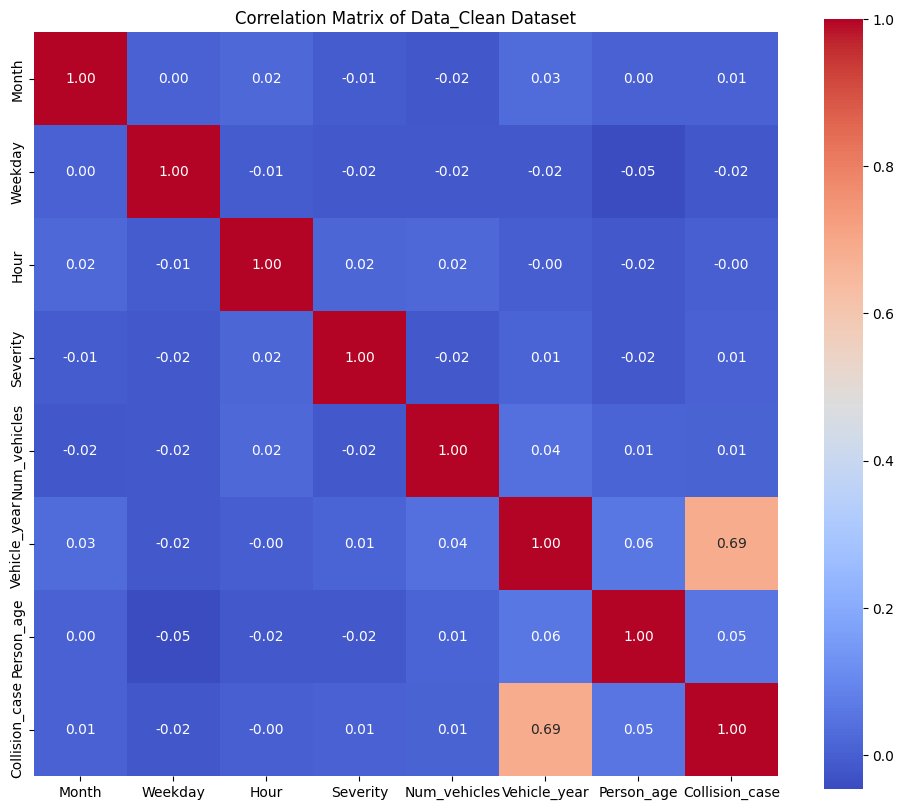

In [ ]:

correlation_matrix = data_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Data_Clean Dataset')
plt.show()

#### Number of Unique Cases

In [ ]:
unique_collision_cases_sum = data_clean['Collision_case'].nunique()
unique_collision_cases_sum

2560782

####  Year with maximum number of unique cases (Sorted in descending order)

In [ ]:
unique_cases_per_year = data_clean.groupby('Year')['Collision_case'].nunique()
unique_cases_per_year.sort_values(ascending=False)

Year
2002    151141
2000    150056
2003    147919
2001    146380
2005    143331
2004    142504
2006    140337
2007    136607
2008    125548
2010    122219
2012    121614
2009    121272
2011    121025
2013    119127
2015    117803
2016    116538
2014    113344
2017    111519
2018    109584
2019    102914
Name: Collision_case, dtype: int64

####  Hour with maximum number of unique cases (Sorted in descending order)

In [ ]:
unique_cases_per_hour = data_clean.groupby('Hour')['Collision_case'].nunique()
unique_cases_per_hour.sort_values(ascending=False)

Hour
16.0    216507
17.0    208441
15.0    203258
14.0    165569
18.0    156661
12.0    154995
13.0    153310
8.0     140341
11.0    130619
19.0    118069
10.0    112298
9.0     107904
7.0     106143
20.0     93194
21.0     87364
22.0     71649
0.0      67204
6.0      59781
23.0     56553
2.0      35483
1.0      34918
3.0      30846
5.0      27487
4.0      22188
Name: Collision_case, dtype: int64

Month with maximum number of unique cases (Sorted in descending order)

In [ ]:
unique_cases_per_month = data_clean.groupby('Month')['Collision_case'].nunique()
unique_cases_per_month.sort_values(ascending=False)

Month
8.0     230469
7.0     229305
12.0    229233
10.0    227656
11.0    226297
6.0     226175
9.0     224721
1.0     222168
5.0     203701
2.0     188920
3.0     180834
4.0     171209
0.0         94
Name: Collision_case, dtype: int64

Weekday with maximum number of unique cases (Sorted in descending order)

In [ ]:
unique_cases_per_weekday = data_clean.groupby('Weekday')['Collision_case'].nunique()
unique_cases_per_weekday.sort_values(ascending=False)

Weekday
5.0    431478
4.0    392243
3.0    373651
2.0    370748
6.0    351332
1.0    350362
7.0    290767
0.0       201
Name: Collision_case, dtype: int64

In [ ]:
unique_cases_per_for_collisionconfiguration = data_clean.groupby('Collision_configuration')['Collision_case'].nunique()
unique_cases_per_for_collisionconfiguration.sort_values(ascending=False)

Collision_configuration
21    625006
35    344135
6     338104
36    184885
33    156030
4     150438
50    136063
2     128656
3     110396
0      79816
22     72884
31     72489
1      32307
41     31731
23     26813
24     21457
32     19178
34     13691
5      10330
25      6373
Name: Collision_case, dtype: int64

In [ ]:
#Checking the Severity level
severity_counts = data_clean['Severity'].value_counts()
severity_counts

2.0    6385227
1.0     107453
Name: Severity, dtype: int64

In [ ]:
data_clean.isnull().sum()

Year                       0
Month                      0
Weekday                    0
Hour                       0
Severity                   0
Num_vehicles               0
Collision_configuration    0
Road_configuration         0
Weather_condition          0
Road_surface               0
Road_alignment             0
Traffic_control            0
vehicle_id                 0
Vehicle_type               0
Vehicle_year               0
Person_id                  0
Person_sex                 0
Person_age                 0
Person_position            0
Person_injury_severity     0
Safety_device_used         0
Road_user_type             0
Collision_case             0
dtype: int64

In [ ]:
data_clean.shape

(6492680, 23)

Percentage of data dropped

In [ ]:
(1 - (6492680/6913204))*100


6.082910326384116

In [ ]:
data

,Year,Month,Weekday,Hour,Severity,Num_vehicles,Collision_configuration,Road_configuration,Weather_condition,Road_surface,...,Vehicle_type,Vehicle_year,Person_id,Person_sex,Person_age,Person_position,Person_injury_severity,Safety_device_used,Road_user_type,Collision_case
3,2000,1.0,1.0,17.0,2.0,1.0,50,0,5,2,...,50,2001.0,1,F,16.0,99,2,50,3,151441.0
4,2000,1.0,1.0,17.0,2.0,1.0,50,0,5,2,...,50,2001.0,2,F,16.0,99,2,50,3,151441.0
6,2000,1.0,1.0,10.0,2.0,1.0,2,0,4,3,...,50,2001.0,1,F,31.0,99,2,50,3,151460.0
8,2000,1.0,1.0,10.0,2.0,1.0,2,0,4,3,...,50,2001.0,1,M,61.0,99,2,50,3,151461.0
10,2000,1.0,1.0,8.0,2.0,3.0,21,0,1,2,...,50,2000.0,1,N,33.0,11,1,50,0,151509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913198,2019,12.0,7.0,23.0,2.0,2.0,35,2,2,2,...,1,2016.0,1,F,39.0,11,1,2,1,2785585.0
6913199,2019,12.0,7.0,23.0,2.0,2.0,35,2,2,2,...,1,2016.0,2,M,38.0,12,2,2,2,2785585.0
6913200,2019,12.0,7.0,23.0,2.0,2.0,35,2,2,2,...,1,2011.0,1,M,30.0,11,2,2,1,2785585.0
6913202,2019,0.0,0.0,17.0,1.0,1.0,1,50,NaN,5,...,1,2007.0,1,M,50.0,11,1,1,1,2786255.0


In [ ]:
data.to_csv('/content/drive/MyDrive/capstone.csv')


Univariate Plots : Histogram Plots of Person_age, Year, Month, Weekday, Hour

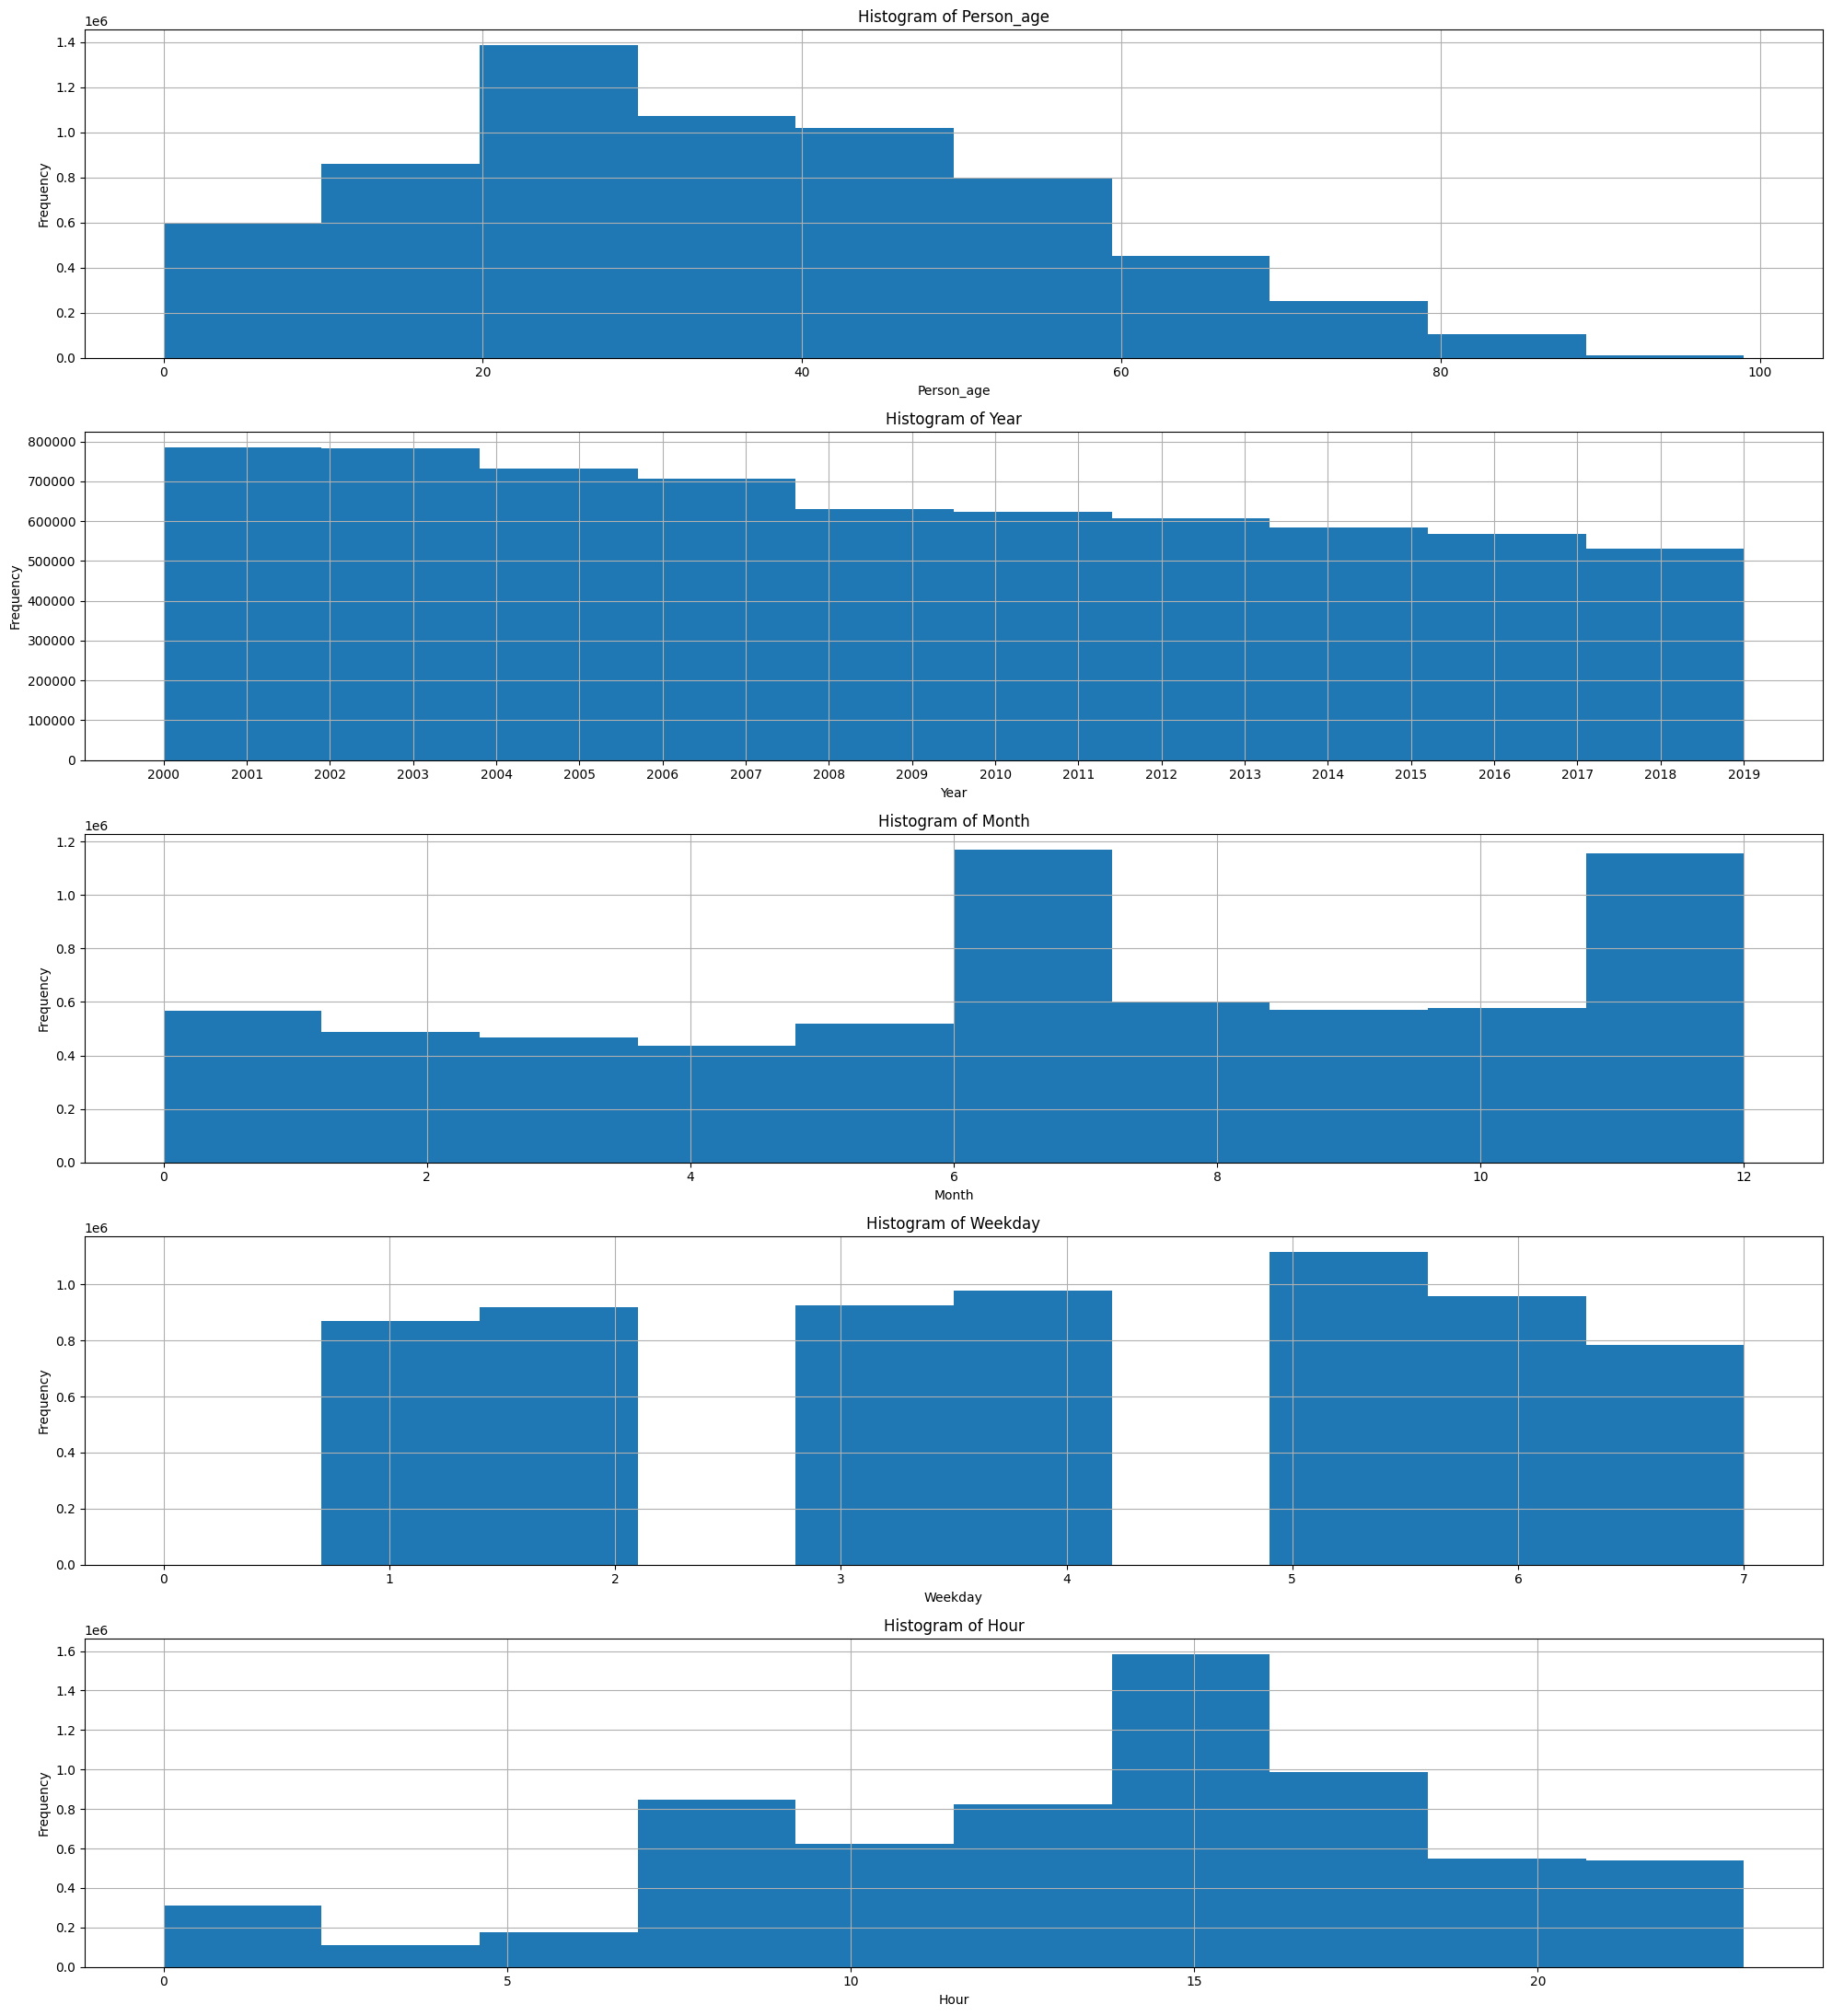

In [ ]:
plt.figure(figsize=(20, 22))
important_continous_values = ['Person_age', 'Year', 'Month', 'Weekday', 'Hour']

for i, column in enumerate(important_continous_values, 1):
    plt.subplot(len(important_continous_values), 1, i)
    data[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()


plt.show()

Histogram of Person_age:

- Shows age distribution of persons in incidents.
- Majority aged 20-30 years.
- Frequency decreases with increasing age.

Histogram of Year:
- Incident frequency from 2000 to 2019.
- Relatively stable with fluctuations.
- Notable decrease after 2010.

Histogram of Month:
- Incident distribution across months.
- Significant peak might be indicating seasonal effects.
- Maximum number of cases are in August, and then in Second

Histogram of Weekday:
- Uniform incident frequency across the week.
- Slight daily variations.

Histogram of Hour:
- Non-uniform distribution across hours of the day.
- Peaks during certain hours, likely rush or late-night hours.

In [ ]:
#!pip install summarytools
#from summarytools import dfSummary
#dfSummary(data)

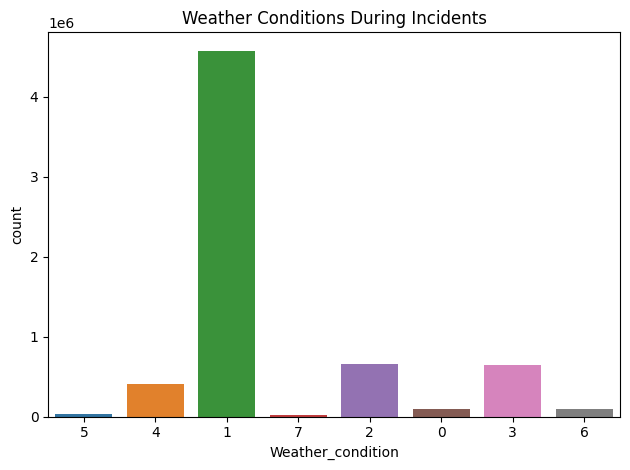

In [ ]:
#Checking the weather conditions
sns.countplot(x='Weather_condition', data=data)
plt.title('Weather Conditions During Incidents')

plt.tight_layout()
plt.show()

Most of the accidents have occured in clear and sunny weather,secondly  in raining weather condition and  thirdly in overcast, cloudy but no precipitation.

## Bivariate analysis

1. Count of Cases over the Years

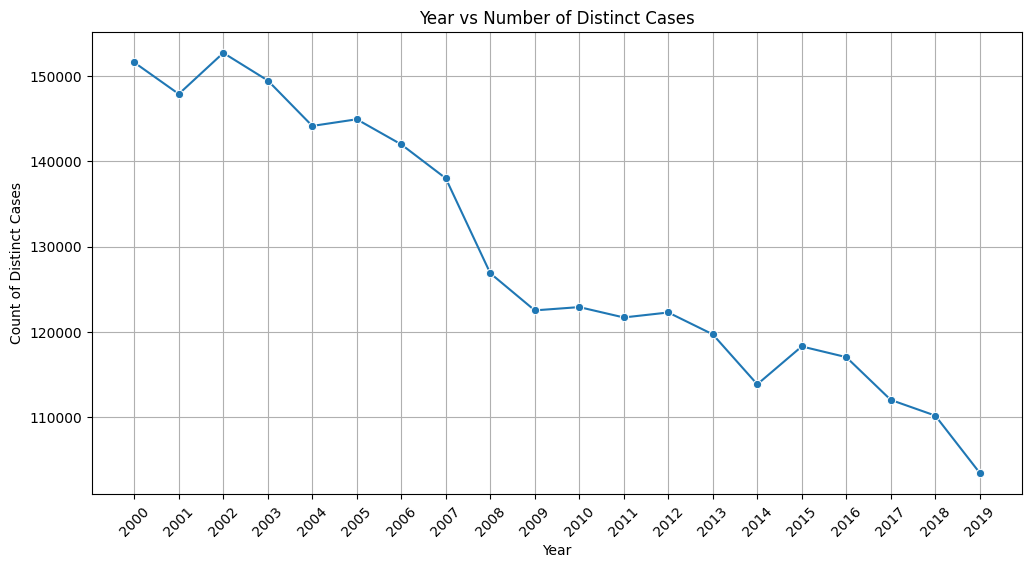

In [ ]:
yearly_case_count = data.groupby('Year')['Collision_case'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Collision_case', data=yearly_case_count, marker='o')
plt.title('Year vs Number of Distinct Cases')
plt.xlabel('Year')
plt.ylabel('Count of Distinct Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We can observe a gradual decrease in the number of accidents throughtout the years.

2. Bar Graph of Safety Device Used vs Passenger Age

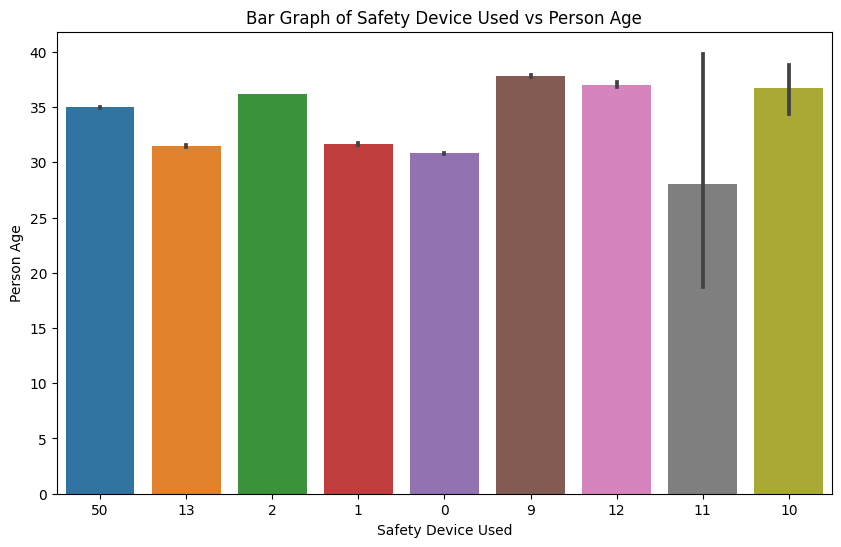

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Safety_device_used', y='Person_age', data=data_clean)

plt.title('Bar Graph of Safety Device Used vs Person Age')
plt.xlabel('Safety Device Used')
plt.ylabel('Person Age')
plt.show()


- Reflective clothing and the combination of helmets and reflective clothing - are used by an older age group on average, suggesting that more experienced individuals might prioritize visibility and protection.
- There is a consistent trend of people in their early to mid-30s not using safety devices or only using standard safety devices, indicating this age group may be less inclined to use specialized safety equipment.

**3**. Collision Case counts for various vehicle type

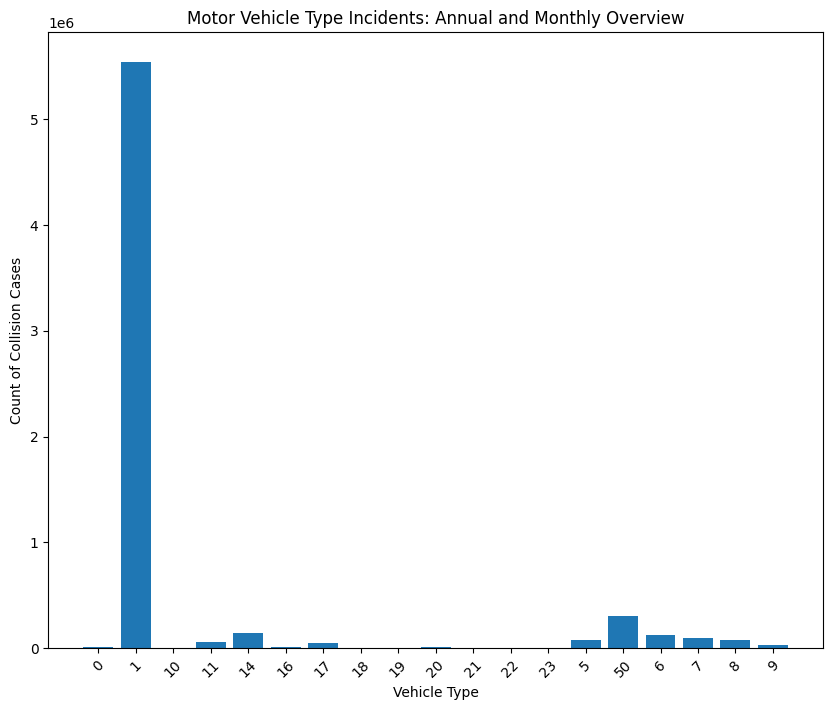

In [ ]:
data['Collision_case'] = pd.to_numeric(data['Collision_case'], errors='coerce')
data['Vehicle_type'] = data['Vehicle_type'].astype(str)
collision_counts = data.groupby('Vehicle_type')['Collision_case'].count()
plt.figure(figsize=(10, 8))
plt.bar(collision_counts.index, collision_counts.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Count of Collision Cases')
plt.title('Motor Vehicle Type Incidents: Annual and Monthly Overview')
plt.xticks(rotation=45)
plt.show()

- Light Duty Vehicles top collision stats; likely from being most common on roads.
- Fewer mishaps with big rigs and buses hint at less road time or safer driving.
- Bikes and motorbikes see moderate trouble, balancing numbers and risk.
- Rare incidents with farm gear and fire engines point to scarce road use or stricter safety.

4. Number of collision for each hour

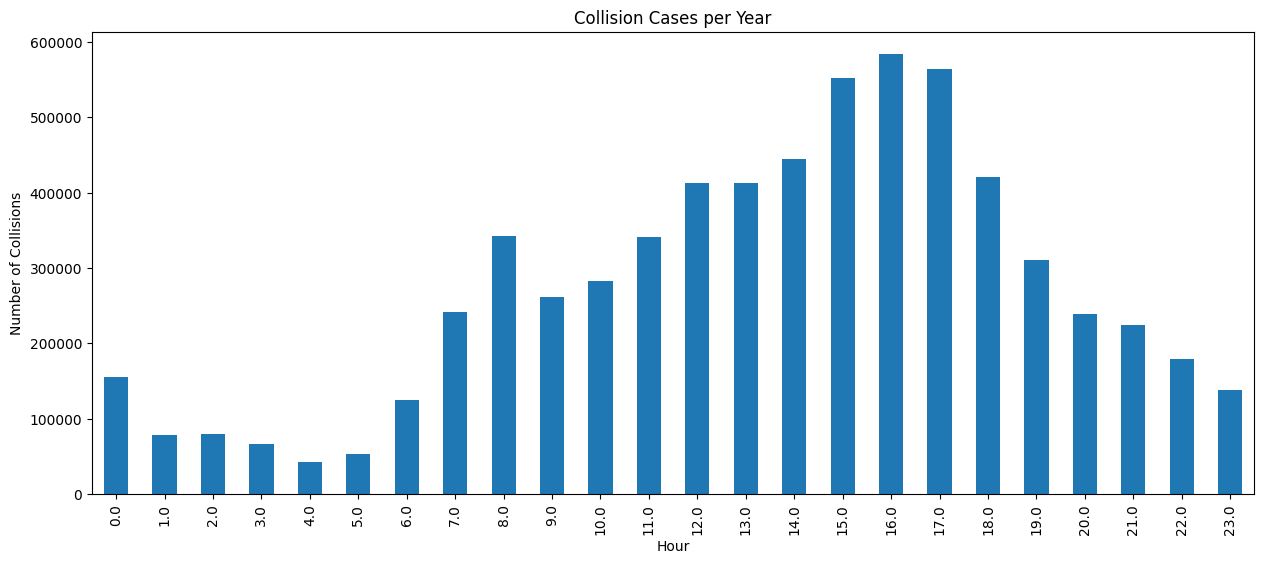

In [ ]:
Collision_counts = data.groupby('Hour').size()
plt.figure(figsize=(15,6))
Collision_counts.plot(kind='bar')
plt.title('Collision Cases per Year')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')
plt.show()

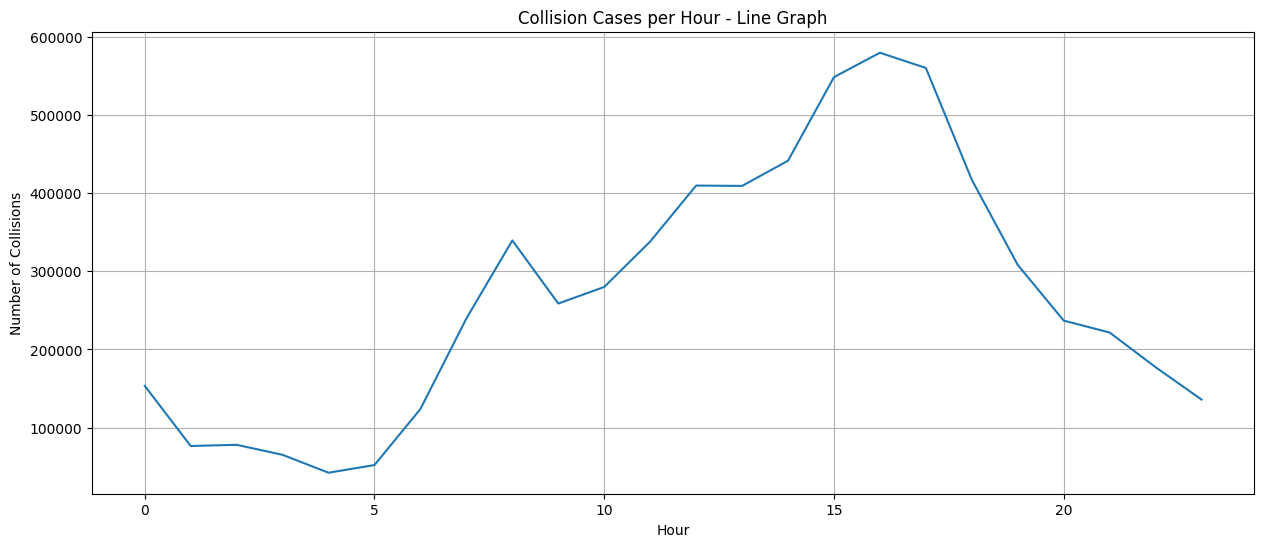

In [ ]:
Collision_counts = data_clean.groupby('Hour').size()
plt.figure(figsize=(15, 6))
Collision_counts.plot(kind='line')
plt.title('Collision Cases per Hour - Line Graph')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

5. Heatmap to check the relationship between Weather Conditions and Road Surface Type

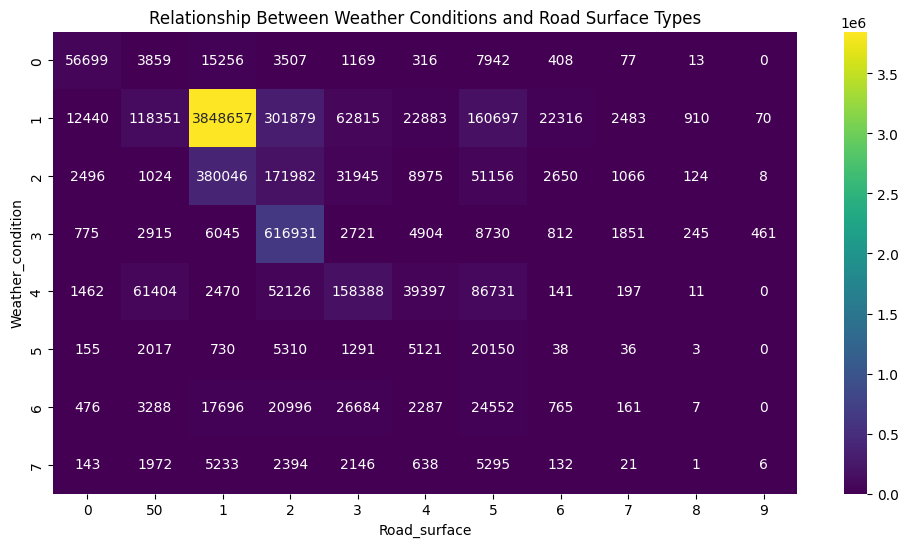

In [ ]:
weather_road_crosstab = pd.crosstab(data_clean['Weather_condition'], data_clean['Road_surface'])
plt.figure(figsize=(12, 6))
sns.heatmap(weather_road_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship Between Weather Conditions and Road Surface Types')
plt.show()

6. Checking the Average Number of vehicles involved in Collision Cases

In [ ]:
num_vehicles_collision_group = data_clean.groupby('Collision_case')['Num_vehicles'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Collision_case', y='Num_vehicles', data=num_vehicles_collision_group)
plt.title('Average Number of Vehicles Involved by Collision Case')
plt.show()

*************************************************************************************************************

**************************************************************************************************************************************************************